# Predição de Churn de Clientes

## Escopo

Para o desenvolvimento do relatório, foi utilizado o *dataset* de *churn* dos clientes de uma empresa de telecomunicações, disponível no site da IBM por meio do [link](https://community.watsonanalytics.com/wp-content/uploads/2015/03/WA_Fn-UseC_-Telco-Customer-Churn.csv).

## Metodologia

Para a execução dos modelos de classificação e predição, foram utilizadas os seguintes atributos:

* __MonthlyCharges__: indica o quanto custa ao cliente o conjunto de serviços que este contratou;
* __TotalCharges__: o quanto o cliente já gastou contratanto o pacote;
* __tenure__: a "idade" do cliente no sistema. Para clientes ativos, é uma métrica utilizada desde a data da conversão deste até o momento atual. Para clientes que entraram em *churn*, indica o tempo entre a conversão do cliente e o *churn*
* __PaymentMethod__: enumera as formas de pagamento selecionadas pelo cliente no momento da contração. Estas podem ser _CreditCard_, _MailedCheck_, _ElectronicCheck_ e _BankTransfer (automatic)_.
* __InternetService__: indica se um dos serviços contratados pelo cliente é o serviço de internet e se o tipo deste é _DSL_ ou _Fiber Optic_.
* __PhoneService__: informa se o cliente possui ou serviço telefônico.

Apesar de possuir outros tipos de serviços, estes eram inteiramente dependentes dos atributos _InternetService_ e _PhoneService_, ou seja, se estes fossem negativos, os demais serviços também seriam, sendo assim, foram excluídos da análise.

Estes atributos foram selecionados partindo da hipótese de que o Churn estaria atrelado ao quanto os clientes pagam pelos serviços, quais são estes serviços e por qual meio o pagamento é realizado.

## Resultados

Após a exeução dos modelos, obteve-se os seguintes resultados:

Score do modelo de Árvore de Decisão: ~0.7977
Matriz de confusão: 
[2418  177]
[ 535  390]].

Score do modelo de Regressão Logística: ~0.7930
Matriz de confusão: 
[2344  251]
[ 478  447]

Por meio dos resultados, observa-se uma semelhança na assertividade de ambos os modelos, indicando que, apesar de utilizarem algoritmos diferentes para a classificação, ambos obteram êxito na classificação de ambos o *datasets*.

Para o teste de predição, foi criar um caso de um cliente que utiliza serviços de internet e telefonia, com gastos mensais de 99,90 dólares, tempo de fidelizalção de 5 meses, gerando um custo total de 500,00 dólares, sendo estes valores pagos por meio de Cartão de Crédito. 

Quando realizada a predição para o caso informado, ambos os modelos informaram que o cliente realizaria *churn*.



# Preparação dos Dados 

Para desenvolvimento do trabalho, serao utilizadas as bibliotecas Numpy, Pandas, Graphviz, Matplotlib, Seaborn e SciKit Learn.


In [1]:
import numpy as np
import pandas as pd
import graphviz
import seaborn as sb
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

Importando o *dataset* de *churn* disponibilizado pela IBM

In [2]:
df_raw = pd.read_csv("telco_churn.csv")

NameError: name 'pd' is not defined

Aqui estou executando o tratamento das *features* da base para análise exploratória pelo Seaborn:

In [202]:
lbl = preprocessing.LabelEncoder()

for column_name in df_raw.columns:
    if df_raw[column_name].dtype == object and column_name != "Churn":
        df_raw[column_name] = lbl.fit_transform(df_raw[column_name])
    else:
        pass

# Análise Exploratória
Nesta etapa serão realizadas análises do atributos (features) do *dataset* a fim de identificação padrões e correlações, servindo assim de subsídio para os modelos de classificação.

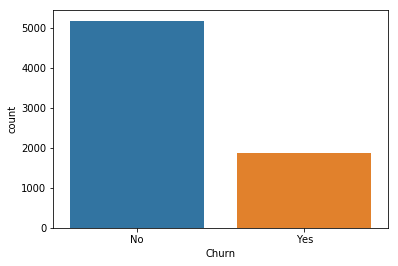

In [203]:
sb.countplot(data=df_raw, x='Churn')

Impriminto as relações entre as variáveis selecionadas e o *churn*:

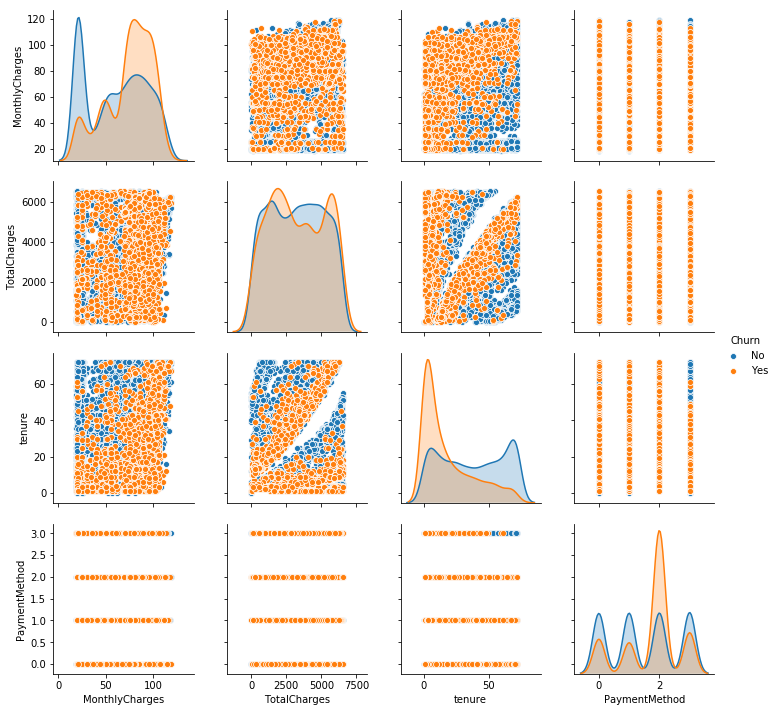

In [204]:
sb.pairplot(df_raw, vars=['MonthlyCharges','TotalCharges','tenure','PaymentMethod'], hue='Churn')

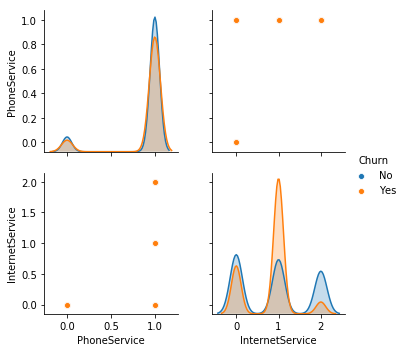

In [175]:
sb.pairplot(df_raw, vars=['PhoneService','InternetService'], hue='Churn')

# Implementação dos Modelos
Nesta etapa serão executados os modelos de Árvore de Decisão e Regresssão Logísitica.

## Seleção das Features
Após a análise exploratória, serão selecionadas os atributos (features) de interesse para aplicação nos modelos.

In [176]:
df_features = df_raw[['PhoneService','InternetService','MonthlyCharges','tenure','TotalCharges','PaymentMethod']]
df_targets = df_raw['Churn']

Realizando o split do dataset em treino e validação.

In [177]:
x_train, x_test, y_train, y_test = train_test_split(df_features, df_targets, test_size = 0.5)

## Modelo de Árvore de Decisão

Criando um classificador e rodando a árvores de decisão para todas as *features* do *dataset* tendo o Churn como target da classificação


In [178]:
tree_clf = tree.DecisionTreeClassifier(random_state=111, criterion='gini',max_depth=3,min_samples_leaf=3)

Executando o treinamento do modelo:

In [179]:
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=111,
            splitter='best')

Verificando a assertividade do modelo:

In [180]:
print("Score do modelo de Árvore de Decisão: {}".format(tree_clf.score(x_test, y_test)))
print("Matriz de confusão: {}.".format(confusion_matrix(y_test,tree_clf.predict(x_test))))

Score do modelo de Árvore de Decisão: 0.7977272727272727
Matriz de confusão: [[2418  177]
 [ 535  390]].


Realizando a impressão da árvore de decisão gerada:

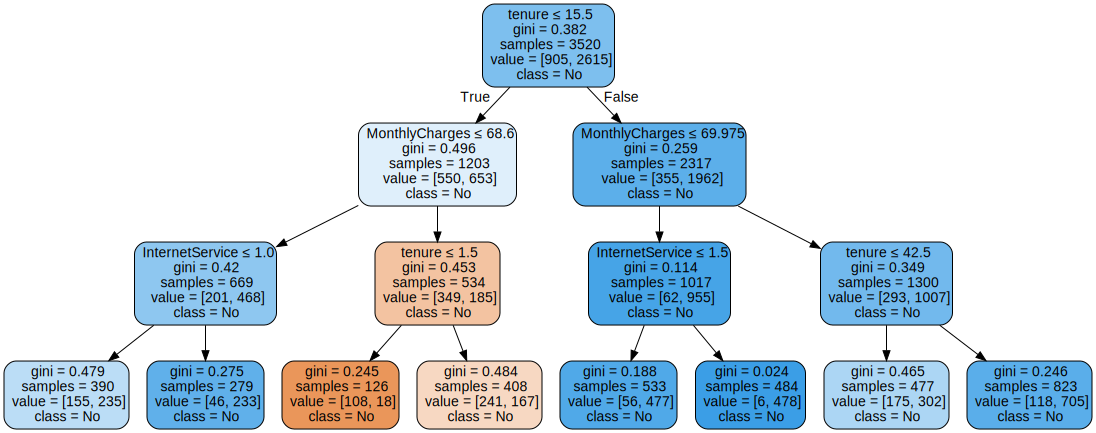

In [181]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=df_features.columns,
                         class_names=df_targets,
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph

## Modelo de Regressão Logística

In [182]:
log_regression = LogisticRegression(solver='lbfgs', random_state=5, multi_class='multinomial', max_iter=500)
log_regression.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=5, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [183]:
print("Score do modelo de Regressão Logística: {}".format(log_regression.score(x_test, y_test)))
print("Matriz de confusão: {}.".format(confusion_matrix(y_test,log_regression.predict(x_test))))

Score do modelo de Regressão Logística: 0.7928977272727272
Matriz de confusão: [[2344  251]
 [ 478  447]].


## Predição

Criando um novo caso para a predição:

In [192]:
new_case = np.array([[1,1,99.9,5,500,1]])
new_case.shape

(1, 6)

Executando a predição com o modelo de árvore de decisão:

In [195]:
tree_prediciton = tree_clf.predict(new_case)
tree_prediciton

array(['Yes'], dtype=object)

Executando a predição com o modelo de regressão logística:

In [198]:
reglog_prediction = log_regression.predict(new_case)
reglog_prediction

array(['Yes'], dtype=object)